<a href="https://colab.research.google.com/github/mmishra1092/Global-Terrorism-Analysis/blob/main/MAYANK_MISHRA_Global_Terrorism_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

We know that world is facing the problem of terrorism from decades and yet there is nothing much done about it. Yes! the world is coming together to fight against terrorism but we need to ask questions to ourselves that is it enough? So before we take you all through the conclusion and insights of GTD dataset, we want to start by taking you through some of the basics principles of analysing which we have used in this journey. Analysing such as large dataset was not a easy task, but with time and persistence we have concluded so many insights from it.

We knew that it would not be easy to evaluate things without following some basics steps which are:

1) **Dataset understanding:** In this dataset the first hurdle which we came    through was that there is no problem statment and so we have to decide objective all by ourselves and try to derive as many insights as we could.

2) **Taking relevant variables:** Because of such a large dataset,it was a tough task to work only on the relevant columns. So we filtered out the columns which would make more sense in analysing data as whole.

3) **Data Cleaning:** Basic data cleaning was done to avoid unnecessary missing values and outliers.

4) **Understanding the variable:** We try to understand that how the dependent and independent variable relate to each other.

Now that we understood operations involved in analysing, let's start to find out the possible answers to our objectives. 

In [137]:
# Import all the necessary libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline


In [138]:
# Mount the Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [139]:
# Upload data path
working_path = '/content/drive/MyDrive/Module: 1/Week_4/Capstone Project/Data/global_terrorism_data.csv'

In [140]:
# Read Data
global_terrorism_df = pd.read_csv(working_path, encoding = 'ISO-8859-1', low_memory = False)

In [141]:
# View first 5 rows of original dataset
global_terrorism_df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [142]:
# View last 5 rows of original dataset
global_terrorism_df.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,2.359673,45.385034,2.0,0,The incident occurred near the town of Balcad.,12/31/2017: Assailants opened fire on a Somali...,1,1,0,1.0,1.0,Insurgency/Guerilla Action,0.0,1,0,2,Armed Assault,NaN,NaN,NaN,NaN,4,Military,36.0,Military Checkpoint,Somali National Army (SNA),Checkpoint,...,NaN,NaN,NaN,1.0,0.0,0.0,2.0,0.0,0.0,-9,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,Middle East & North Africa,Lattakia,Jableh,35.407278,35.942679,1.0,1,The incident occurred at the Humaymim Airport.,12/31/2017: Assailants launched mortars at the...,1,1,0,1.0,1.0,Insurgency/Guerilla Action,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,4,Military,27.0,Military Barracks/Base/Headquarters/Checkpost,Russian Air Force,Hmeymim Air Base,...,NaN,NaN,Mortars were used in the attack.,2.0,0.0,0.0,7.0,0.0,0.0,1,4.0,Unknown,-99.0,Seven military planes were damaged in this att...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,Southeast Asia,Maguindanao,Kubentog,6.900742,124.437908,2.0,0,The incident occurred in the Datu Hoffer distr...,12/31/2017: Assailants set fire to houses in K...,1,1,1,0.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,14,Private Citizens & Property,76.0,House/Apartment/Residence,Not Applicable,Houses,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1,4.0,Unknown,-99.0,Houses were damaged in this attack.,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,South Asia,Manipur,Imphal,24.798346,93.940430,1.0,0,The incident occurred in the Mantripukhri neig...,12/31/2017: Assailants threw a grenade at a Fo...,1,1,1,0.0,NaN,NaN,0.0,0,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,2,Government (General),21.0,Government Building/Facility/Office,Forest Department Manipur,Office,...,NaN,NaN,A thrown grenade was used in the attack.,0.0,0.0,0.0,0.0,0.0,0.0,-9,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,Southeast Asia,Maguindanao,Cotabato City,7.209594,124.241966,1.0,0,NaN,12/31/2017: An explosive device was discovered...,1,1,1,0.0,NaN,NaN,0.0,0,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,20,Unknown,NaN,NaN,Unknown,Unknown,...,NaN,NaN,An explosive device containing a detonating co...,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [143]:
# Original dataset information
global_terrorism_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [144]:
global_terrorism_df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,181691.000000,181691.000000,181691.000000,181691.000000,181690.000000,29011.000000,181690.000000,181691.000000,181691.000000,181691.000000,6314.000000,428.000000,181691.000000,171318.000000,180132.000000,11144.000000,10685.000000,10828.000000,1176.000000,1097.000000,1147.000000,181311.000000,1955.000000,320.000000,181691.000000,110576.000000,112202.000000,115571.000000,19083.000000,1890.000000,616.000000,318.000000,133.000000,4839.000000,181691.000000,160923.000000,13127.000000,11542.000000,1863.000000,1693.000000,73.000000,70.000000,171378.000000,117245.000000,114733.000000,165380.000000,116989.000000,112548.000000,181691.000000,64065.000000,3.898900e+04,181513.000000,13572.000000,13517.000000,4063.000000,8124.000000,77381.000000,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,0.068297,0.988530,0.993093,0.875668,-0.523171,1.292923,0.137773,0.889598,0.036507,3.247547,3.719512,5.245327,8.439719,46.971474,127.686441,10.247218,55.311652,131.179442,10.021259,55.548769,144.564952,0.081440,0.265473,0.193750,0.002950,-65.361154,-1.517727,0.049666,7.022848,0.247619,7.176948,0.411950,6.729323,-6.296342,6.447325,11.117162,6.812524,10.754029,6.911433,11.643237,6.246575,10.842857,2.403272,0.045981,0.508058,3.167668,0.038944,0.107163,-0.544556,3.295403,2.088119e+05,0.059054,4.533230,-0.353999,-46.793933,-32.516371,-0.145811,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,0.284553,0.106483,0.082823,0.329961,2.455819,0.703729,0.344663,0.313391,0.187549,1.915772,2.272023,2.246642,6.653838,30.953357,89.299120,5.709076,25.640310,125.951485,5.723447,26.288955,163.299295,0.273511,0.441698,0.395854,0.054234,216.536633,12.830346,1.093195,2.476851,0.974018,2.783725,0.492962,2.908003,4.234620,2.173435,6.495612,2.277081,7.594574,2.177956,8.493166,1.507212,8.192672,11.545741,5.681854,4.199937,35.949392,3.057361,1.488881,3.122889,0.486912,1.552463e+07,0.461244,202.316386,6.835645,82.800405,121.209205,1.207861,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,-9.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,-99.000000,-9.000000,1.000000,-9.000000,1.000000,0.000000,1.000000,-9.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,-9.900000e+01,-9.000000,-99.000000,-99.000000,-99.000000,-99.000000,-9.000000,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000

Now, that we have got the summarize information about the variables and values from datset what we can conclude are:

  

1.   **Null values:** There are very large number of null values in this dataset.
2.   
 **Variable type:** There are mainly numerical values and categorical values in dataset.



**What all can we conclude from this dataset?**


*   We can work on the hot regions of attack all over the world.
*   We can understand the types of weapons used in attack.

*   We can know that who all are targeted mostly.
*   Also, which region has less number of attacks.

*   How desctructive can be the attack can also be concluded?
*   Which all terrorist group are mostly active?

These are some basics objectives which we are going to work on this journey.

Now, that we have got the basic idea of datset and our objectives, it's time we deep dive and start analysing the terrorism activities around the world. 





    





In this step what we have done is that we change the name of the columns which we are going to work on, so that it would be easy to understand the analsyis and visulaization.

In [145]:
# Rename the relevant column
global_terrorism_df.rename(columns = {'eventid':'id','iyear':'year','imonth':'month','iday':'day','country_txt':'Country','region_txt':'Region',
                                      'provstate':'state','attacktype1_txt':'attack_type','target1':'target','nkill':'killed',
                                      'nwound':'wound','gname':'group','weaptype1_txt':'weapon_type'},inplace = True)

Well, after renaming the relevant columns, we need to create another dataframe, in which relevant columns are included which are going to be the main focus of our study.

In [146]:
# Create the dataframe of relevant dataframe
global_terrorism_relevant_df = global_terrorism_df[['id','year','month','day','Country','Region','state','city','attack_type','target',
                                                            'killed','wound','group','weapon_type']]

In [147]:
# Numberof rows columns of relevant dataset
global_terrorism_relevant_df.shape

(181691, 14)

In [148]:
global_terrorism_relevant_df.columns.values

array(['id', 'year', 'month', 'day', 'Country', 'Region', 'state', 'city',
       'attack_type', 'target', 'killed', 'wound', 'group', 'weapon_type'],
      dtype=object)

In [149]:
global_terrorism_relevant_df.isnull().sum()

id                 0
year               0
month              0
day                0
Country            0
Region             0
state            421
city             434
attack_type        0
target           636
killed         10313
wound          16311
group              0
weapon_type        0
dtype: int64

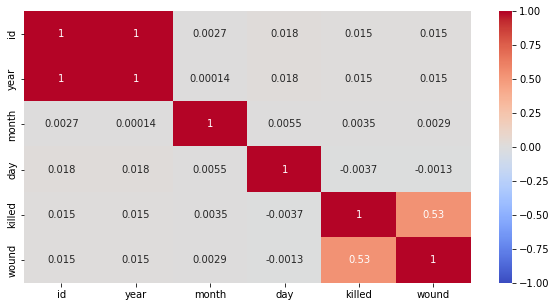

In [150]:
plt.figure(figsize=(10,5))
sns.heatmap(global_terrorism_relevant_df.corr(), vmin=-1, cmap='coolwarm', annot=True);

In [151]:
# Attack type counts
global_terrorism_relevant_df.attack_type.value_counts()

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: attack_type, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


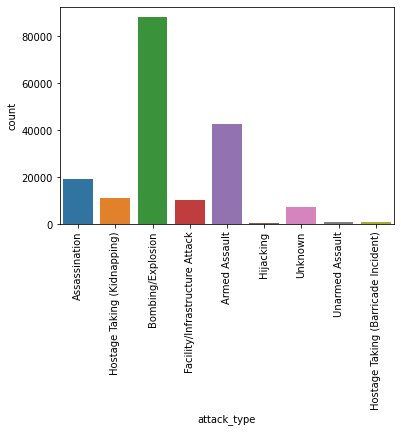

In [152]:
#Plotting number of attack types
sns.countplot(global_terrorism_relevant_df['attack_type']);
plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = (20,7)

**Conclusion:**
Most of the attacks which are done by terrorist uses bombing explosion as weapon because it can be done from far away and they can easily get away with it. To reduce the chances of such activities we must be vigilant enough in all the public places, metro, buses, government offices etc. Also we can see that Hijacking is at the lowest number.

In [153]:
# Most used weapon
global_terrorism_relevant_df.weapon_type.value_counts()

Explosives                                                                     92426
Firearms                                                                       58524
Unknown                                                                        15157
Incendiary                                                                     11135
Melee                                                                           3655
Chemical                                                                         321
Sabotage Equipment                                                               141
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      136
Other                                                                            114
Biological                                                                        35
Fake Weapons                                                                      33
Radiological                                                     

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


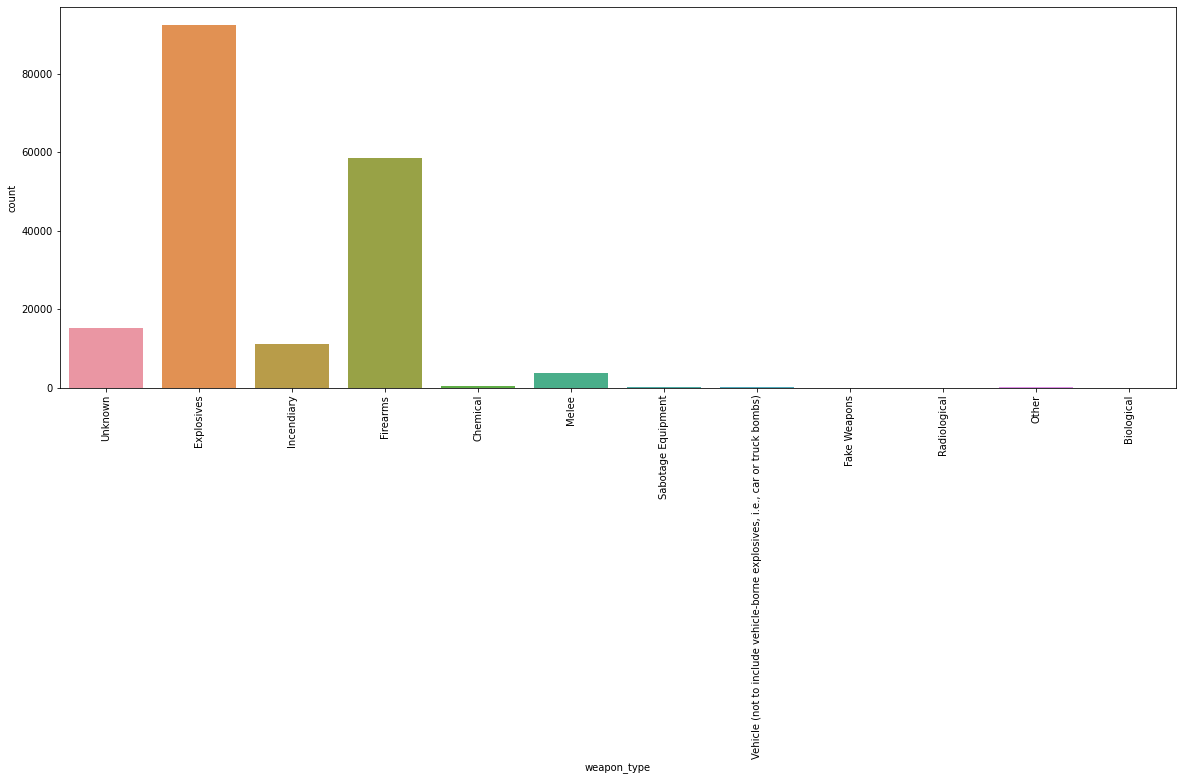

In [154]:
# Types of weapon used plot
sns.countplot(global_terrorism_relevant_df['weapon_type'])
plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = (20,5)
plt.show();

**Conclusion:** From above insights we have seen that most attacks are done by using bombing and explosion, so its not a surprise that explosives are used mostly as weapon type. Also there are few numbers of radiological and biological weapon used which states that with development in the field of science and technology there are chances that these types of weapons can be often used in coming days. In order to avoid such attacks strong norms and laws should be made on world level which should prohibit use of such weapons.

In [155]:
# Most attacked in a region
global_terrorism_relevant_df.Region.value_counts()

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: Region, dtype: int64

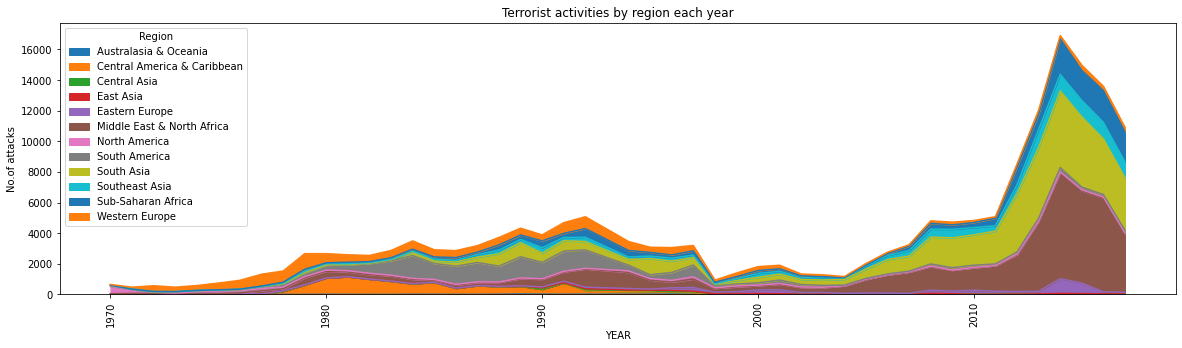

In [156]:
# Terrorist activities by region each year

regional_terrorists_activities = global_terrorism_relevant_df.groupby(['year','Region'])['Region'].count().unstack()
regional_terrorists_activities.plot(kind = 'area')
plt.title('Terrorist activities by region each year')
plt.ylabel('No.of attacks')
plt.xlabel('YEAR')
plt.xticks(rotation=90)

plt.rcParams['figure.figsize'] = (20,5)

Conclusion: Middle East & North Africa and south asia are most hot zone of terrorist attacks and so they are most affected region. Also,South Asia region has more attacks during and after year 2010.

In [157]:
# Top 10 affected countries
top_10_affected_countries = global_terrorism_relevant_df['Country'].value_counts().head(10)
top_10_affected_countries

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64

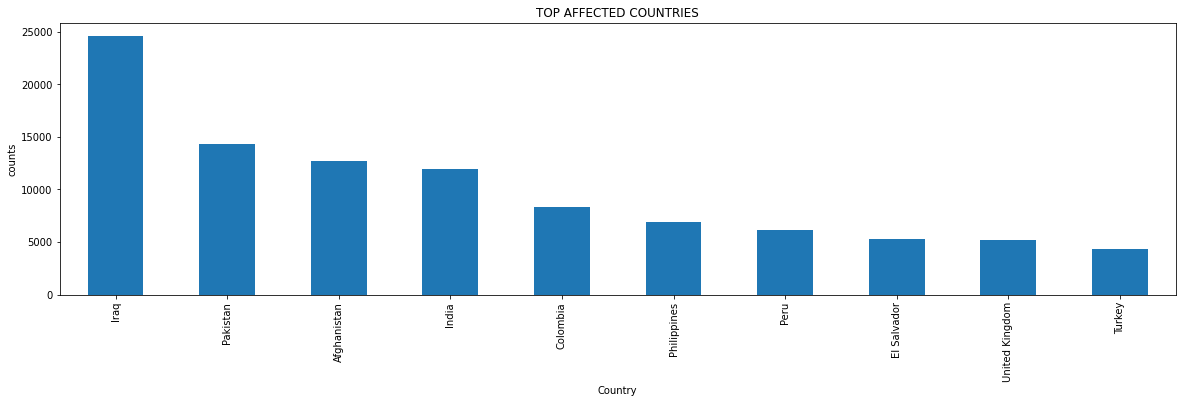

In [158]:
# Plotting top affected countries
top_10_affected_countries.plot(kind='bar')

plt.title('TOP AFFECTED COUNTRIES')
plt.ylabel('counts')
plt.xlabel('Country')
plt.rcParams['figure.figsize'] = (20, 5)

**Conclusion:** Iraq is the most attacked country in world as so it is the most affected country by terrorist attacks. We can also see in the plot that there are five countries from Asia which are mostly attacked by terrorist.
          

In [159]:
# Least attacked countries
least_attacked_countries = global_terrorism_relevant_df['Country'].value_counts().tail(10)
least_attacked_countries

Vatican City           1
Antigua and Barbuda    1
North Korea            1
St. Lucia              1
International          1
New Hebrides           1
Wallis and Futuna      1
Falkland Islands       1
Andorra                1
South Vietnam          1
Name: Country, dtype: int64

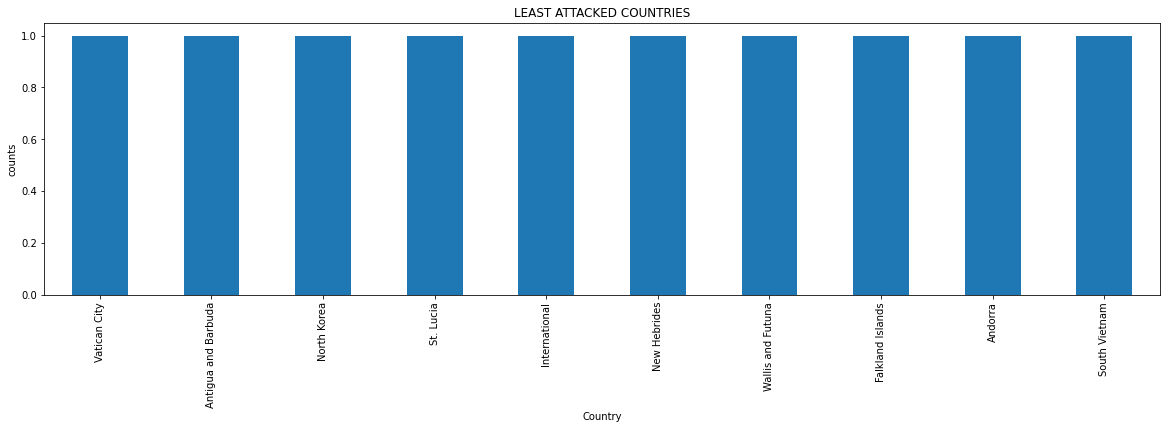

In [160]:
# Least attacked countries
least_attacked_countries.plot(kind='bar')

plt.title('LEAST ATTACKED COUNTRIES')
plt.ylabel('counts')
plt.xlabel('Country')
plt.rcParams['figure.figsize'] = (10, 5)

**Concluison:** Top 10 countries with least number of attacks has same count of attacks and all the countries are less populated.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


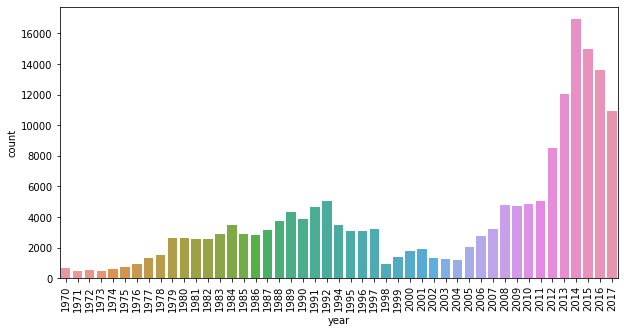

In [161]:
# Attacks in each year
sns.countplot(global_terrorism_relevant_df['year'])
plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = (20, 5)

In [162]:
# Most attacked in a single year
global_terrorism_relevant_df.year.value_counts()

2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
2009     4721
1991     4683
1989     4324
1990     3887
1988     3721
1984     3495
1994     3456
2007     3242
1997     3197
1987     3183
1995     3081
1996     3058
1985     2915
1983     2870
1986     2860
2006     2758
1979     2662
1980     2662
1981     2586
1982     2544
2005     2017
2001     1906
2000     1814
1978     1526
1999     1395
2002     1333
1977     1319
2003     1278
2004     1166
1998      934
1976      923
1975      740
1970      651
1974      581
1972      568
1973      473
1971      471
Name: year, dtype: int64

Conclusion: The most number of attacks were done in year 2014. There is regular increase in number of attacks from 2005. This concludes that 21st century has a large increase in terrorist attacks.

In [163]:
# Top 10 state with most terrorist attacks in world
top_10_attacked_state = global_terrorism_relevant_df['state'].value_counts().head(10)
top_10_attacked_state

Baghdad               7645
Northern Ireland      4498
Unknown               4290
Balochistan           3710
Saladin               3411
Al Anbar              3299
Nineveh               3241
Sindh                 3206
Khyber Pakhtunkhwa    3084
Diyala                3041
Name: state, dtype: int64

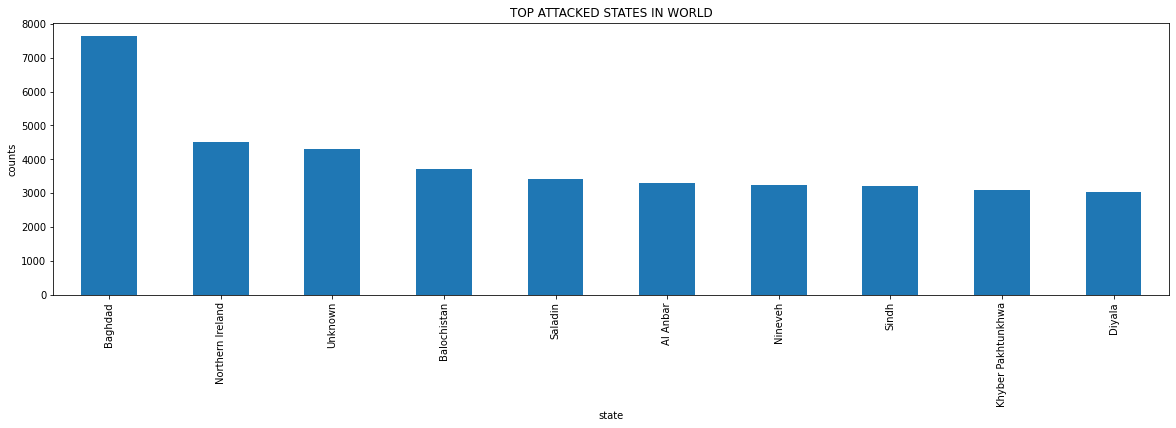

In [164]:
# Plot top affected states in world

top_10_attacked_state.plot(kind='bar')

plt.title('TOP ATTACKED STATES IN WORLD')
plt.ylabel('counts')
plt.xlabel('state')
plt.rcParams['figure.figsize'] = (10, 5)


**Conclusion:** Baghdad (capital of Iraq) is the most attacked and affected state in the world.

In [165]:
# States of India attacked

attack_on_India = global_terrorism_relevant_df[global_terrorism_relevant_df['Country'] == 'India']['state'].value_counts()
attack_on_India


Jammu and Kashmir    2454
Assam                1151
Manipur              1100
Chhattisgarh          979
Punjab                949
Jharkhand             887
Bihar                 688
West Bengal           650
Odisha                428
Maharashtra           302
Meghalaya             294
Andhra Pradesh        251
Orissa                221
Delhi                 208
Uttar Pradesh         201
Tamil Nadu            164
Unknown               157
Tripura               117
Nagaland              115
Kerala                 98
Gujarat                85
Madhya Pradesh         75
Karnataka              71
Haryana                50
Chandigarh             47
Rajasthan              43
Andhra pradesh         41
Mizoram                27
Himachal Pradesh       24
Telangana              24
Uttaranchal            24
Arunachal Pradesh      24
Goa                     5
Sikkim                  4
Puducherry              2
Name: state, dtype: int64

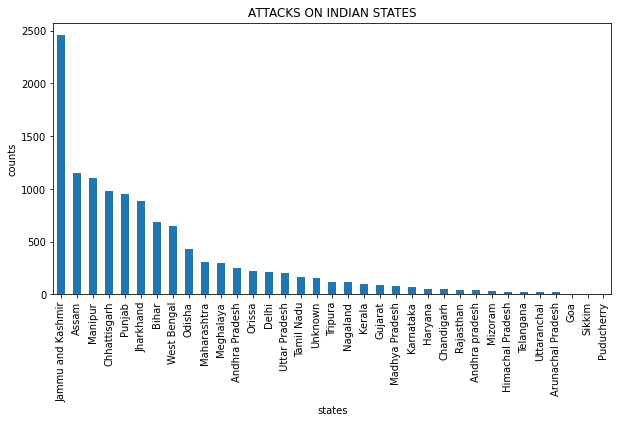

In [166]:
# Plot most attacked Indian state.
attack_on_India.plot(kind='bar')

plt.title('ATTACKS ON INDIAN STATES')
plt.ylabel('counts')
plt.xlabel('states')
plt.rcParams['figure.figsize'] = (20, 5)

Conclusion: Jammu and Kashmir is most attacked state in india

In [167]:
# Most active terrorist group
most_active_terrorist_group = global_terrorism_relevant_df['group'].value_counts().head(10)
most_active_terrorist_group

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Al-Shabaab                                           3288
New People's Army (NPA)                              2772
Irish Republican Army (IRA)                          2671
Revolutionary Armed Forces of Colombia (FARC)        2487
Boko Haram                                           2418
Name: group, dtype: int64

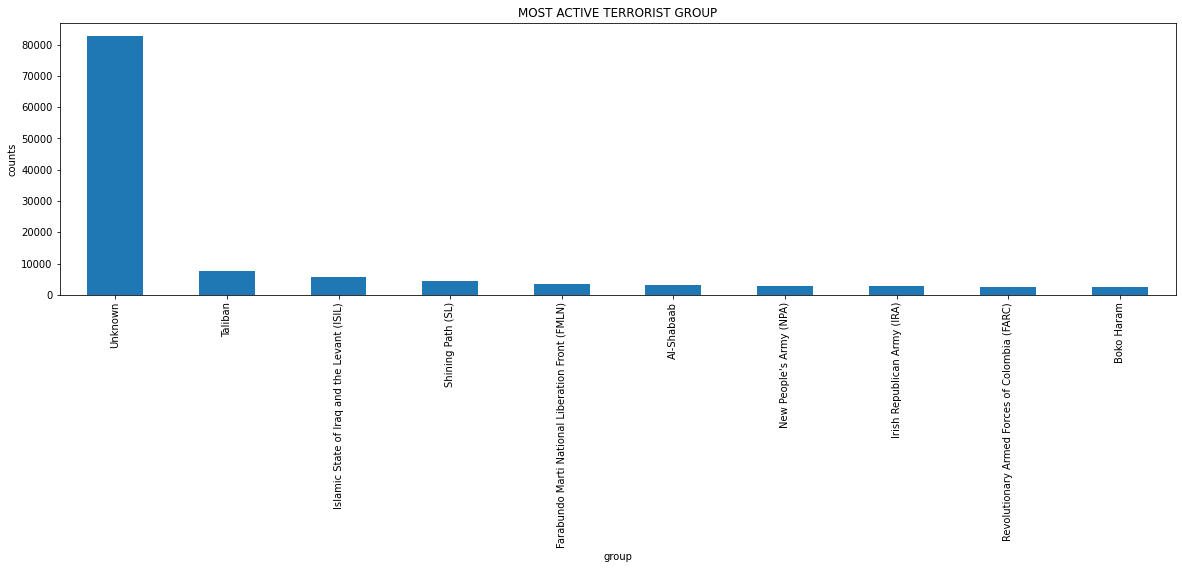

In [168]:
# Plotting most active terrorist group

most_active_terrorist_group.plot(kind='bar')

plt.title('MOST ACTIVE TERRORIST GROUP')
plt.ylabel('counts')
plt.xlabel('group')
plt.rcParams['figure.figsize'] = (20,5)

Conclusion: Most of the terrorist organisation does not take the responsibility of attack.

In [169]:
# Most targetted
target = global_terrorism_relevant_df['target'].value_counts().head(10)
target

Civilians        6461
Unknown          5918
Soldiers         3157
Patrol           2942
Checkpoint       2905
Vehicle          2785
Officers         1787
Village          1679
Military Unit    1533
Bus              1335
Name: target, dtype: int64

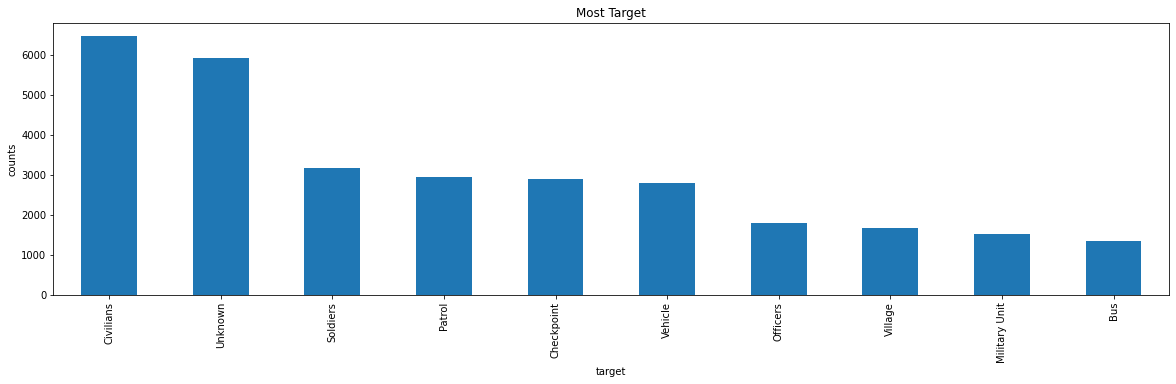

In [170]:
# Plot who were targetted the most
target.plot(kind='bar')

plt.title('Most Target')
plt.ylabel('counts')
plt.xlabel('target')
plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = (10, 5)

Conclusion: Mostly civilians were targetted in terrorist attacks.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


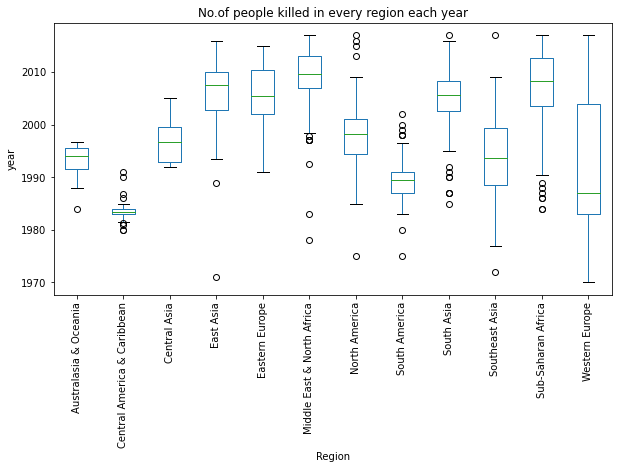

In [171]:
# Total number of people killed in every region each year.

global_terrorism_relevant_df.groupby(['killed','Region'])['year'].mean().unstack().plot(kind = 'box')
plt.title('No.of people killed in every region each year')
plt.xlabel('Region')
plt.ylabel('year')
plt.xticks(rotation = 90)
plt.rcParams['figure.figsize'] = (15, 5)

In [172]:
# States of France attacked

attack_on_France = global_terrorism_relevant_df[global_terrorism_relevant_df['Country'] == 'France']['state'].value_counts()
attack_on_France

Corsica                       1345
Paris                          340
Ile-de-France                  311
Provence-Alpes-Cote d'Azur     128
Aquitaine                      119
                              ... 
Charente                         1
Indre-et-loire                   1
Mayenne                          1
Essonne                          1
Burgundy                         1
Name: state, Length: 70, dtype: int64

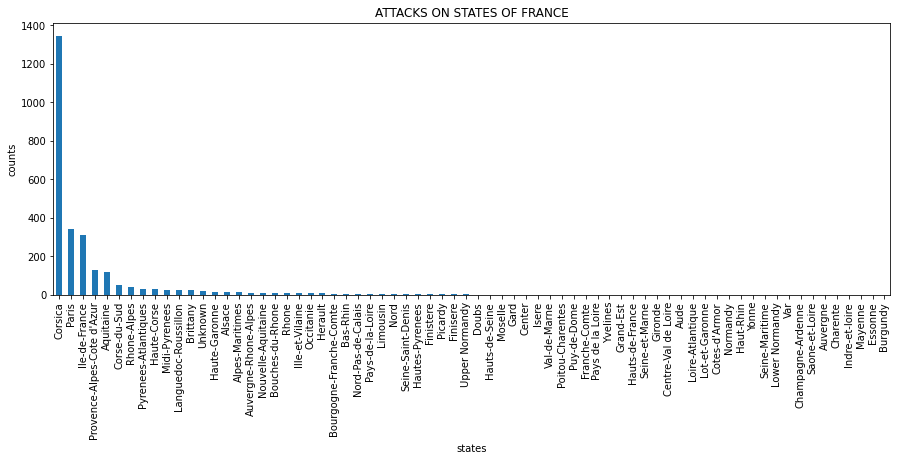

In [173]:
# Plot most attacked state  in France.
attack_on_France.plot(kind='bar')

plt.title('ATTACKS ON STATES OF FRANCE')
plt.ylabel('counts')
plt.xlabel('states')
plt.rcParams['figure.figsize'] = (20, 5)

Conclusion: We can clearly see that even a developed country like France has over 1300 terrorist attack. But the number of attacks is very less as compared to middle east and central Africa region.

In [174]:
# Top 10 Most active terrorist group in France

active_terrorist_group_in_France = global_terrorism_relevant_df[global_terrorism_relevant_df['Country'] == 'France']['group'].value_counts().head(10)
active_terrorist_group_in_France

Unknown                                                 979
Corsican National Liberation Front (FLNC)               637
Corsican National Liberation Front- Historic Channel    128
Separatists                                              84
Resistenza                                               73
Corsican Separatists                                     63
Iparretarrak (IK)                                        57
Action Directe                                           53
Armenian Secret Army for the Liberation of Armenia       49
Breton Liberation Front (FLB)                            32
Name: group, dtype: int64

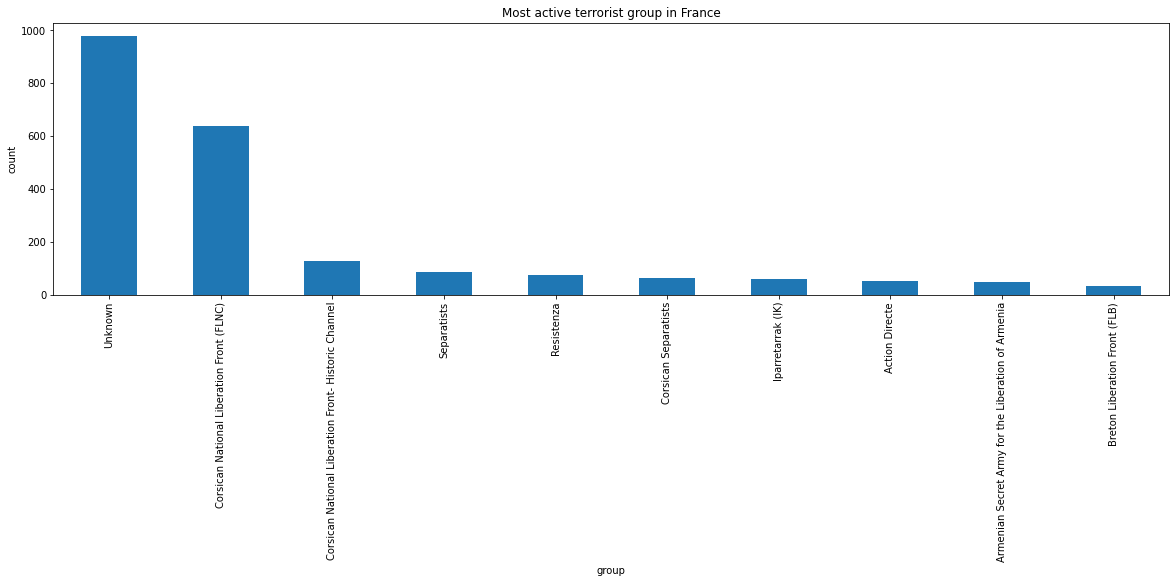

In [175]:
# Plot top 10 most active terrorist group in France.
active_terrorist_group_in_France.plot(kind='bar')

plt.title('Most active terrorist group in France')
plt.ylabel('count')
plt.xlabel('group')
plt.rcParams['figure.figsize'] = (20, 5)

Conclusion: Most of the attacks are not claimed by any terrorist group. Following that FLNC is the most active group in France with 637 attacks.

In [176]:
# Comapring attacks between India and France over the years.
ind2 = global_terrorism_relevant_df.loc[global_terrorism_relevant_df['Country']=='India', ['Country','year']]
india_year = ind2.groupby('year')['year'].count()

France2 = global_terrorism_relevant_df.loc[global_terrorism_relevant_df['Country']=='France', ['Country','year']]
France_year = France2.groupby('year')['year'].count()


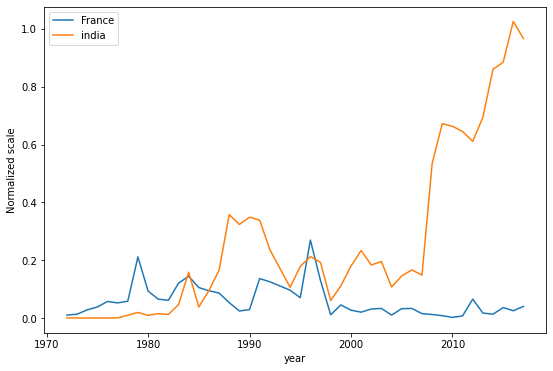

In [177]:
# plot compair
plt.figure(figsize=(9,6))
plt.plot(France_year/1000 , label ='France')        # scaling down to compair the values  
plt.plot(india_year/1000, label= 'india')
plt.xlabel('year')
plt.ylabel('Normalized scale')
plt.legend()

Conclusion: From above plot we can clearly see that over the years number of attacks has drastically increased in India. since the year 2000 the attacks in France has declined. so we can take the help to developed country in order to control terrorism by applying the similar model as the developed countries around the world are using to control the terrorism.

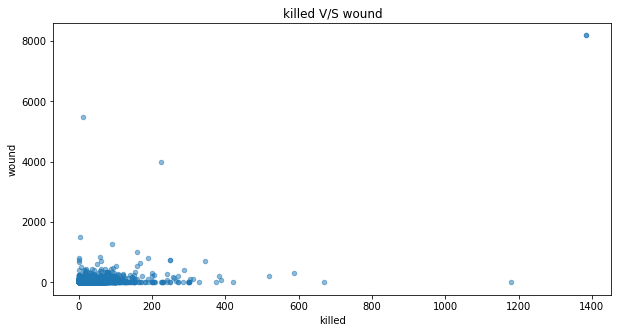

In [178]:
# killed V/S wounded

global_terrorism_relevant_df.plot(kind = 'scatter', x='killed', y='wound',alpha = 0.5, figsize = (10,5))
plt.title('killed V/S wound')
plt.xlabel('killed')
plt.ylabel('wound')
plt.show()

**Overall Conclusion:** We can see by analysis not even a single part of world is untouched by the terrosit attacks. This has become a serious concern for humanity. Other than this the Asian country are mostly affected.

**Safety Measures:** 

1.   All the world leaders should come together and make a strong law agains terrorism,as it is the obstacle in way of human development.
 
2.   Security measures must be updated time to time.

1.   Any one found giving hatred speech must be punished as per the law.
2.   Border security defence system should be efficient enough in order to pevent any attacks.

1.   Most importantly we as citizen must be vigilant enough to suspect any type of suspicious activities.

At last we want to conclude by saying that terrorists are not a enemny of any particular country or region, it is the enenmy to whole of humanity.



  